# Aula 03 - Python
Atividade 01 - Praticando o Python (Etapa 02)\
Desenvolvedor: Ana Julia Pietroski Anderson\
Matrícula: 20206355\

Nesta aula veremos:

1. Numpy arrays e pandas Dataframes
2. Open and export files
3. Conditional Statements
4. Loops em Python
5. Functions - def

## 1.1 Numpy arrays

In [11]:
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.60692753 0.12917937]
 [0.92271612 0.09258374]
 [0.08169668 0.01412231]
 [0.47579267 0.44093326]
 [0.52499428 0.61751285]
 [0.87444349 0.80783576]
 [0.09711551 0.59826608]
 [0.80097101 0.27754464]
 [0.09785953 0.42963221]
 [0.05937318 0.41187584]]
(10, 2)


In [12]:
# Usando Monte-Carlo
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[610.85825437 137.88757813]
 [923.48895613 101.65790716]
 [ 90.87971273  23.98108632]
 [481.03473919 446.52392997]
 [529.74434103 621.33771746]
 [875.69905999 809.75740349]
 [106.14435124 602.28342322]
 [802.96130193 284.76919342]
 [106.88093283 435.33588826]
 [ 68.77944754 417.75707809]]


<class 'numpy.ndarray'>


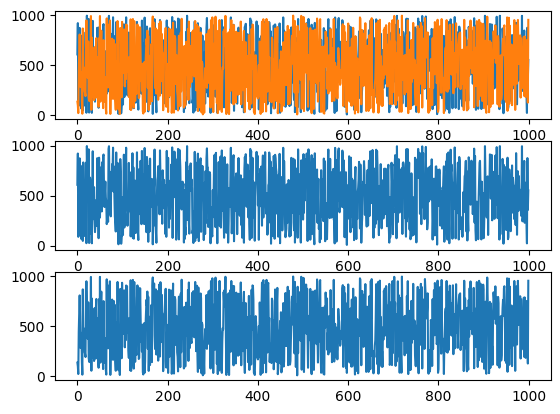

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [14]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.65703625 0.46472616 0.56153317 ... 0.60529049 0.15970654 0.7468833 ]
 [0.13983268 0.19835865 0.41096875 ... 0.71017646 0.16586324 0.14696884]
 [0.0759596  0.82055454 0.21829375 ... 0.06842254 0.71325911 0.72120383]
 ...
 [0.81775339 0.5485141  0.27314857 ... 0.83993182 0.06985325 0.45138498]
 [0.57751201 0.6914038  0.22649732 ... 0.67966984 0.78835535 0.03173809]
 [0.35954818 0.59559451 0.7925048  ... 0.5611446  0.06318618 0.83404361]]


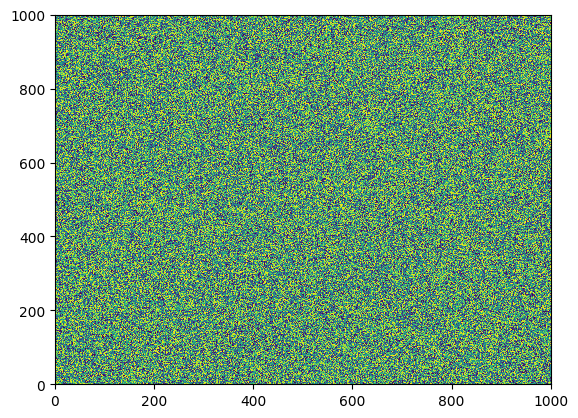

In [15]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [16]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


## PANDAS

In [17]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [18]:
# Monstrando um dataframe
df['datetime'] = dtime

In [19]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [20]:
df['random'][1:10]

1    0.453944
2    0.262113
3    0.597255
4    0.640628
5    0.444624
6    0.307638
7    0.672983
8    0.924011
9    0.328445
Name: random, dtype: float64

In [21]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [22]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.709136
2022-01-01 01:00:00,2022-01-01 01:00:00,0.453944
2022-01-01 02:00:00,2022-01-01 02:00:00,0.262113
2022-01-01 03:00:00,2022-01-01 03:00:00,0.597255
2022-01-01 04:00:00,2022-01-01 04:00:00,0.640628
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.370537
2022-12-31 20:00:00,2022-12-31 20:00:00,0.246345
2022-12-31 21:00:00,2022-12-31 21:00:00,0.073345


In [23]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

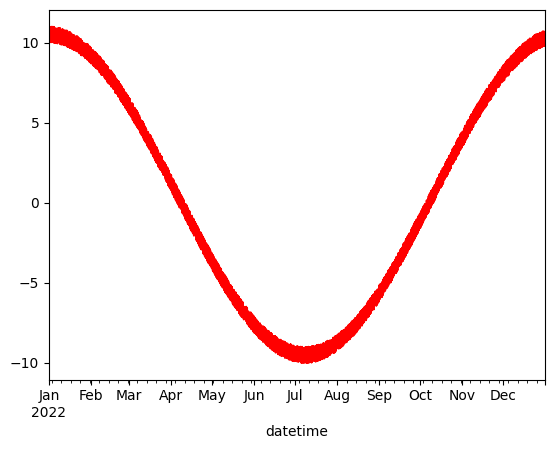

In [24]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [25]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.709136,2022,1,1,1.000000,10.709136
2022-01-01 01:00:00,2022-01-01 01:00:00,0.453944,2022,1,1,1.000000,10.453941
2022-01-01 02:00:00,2022-01-01 02:00:00,0.262113,2022,1,1,0.999999,10.262103
2022-01-01 03:00:00,2022-01-01 03:00:00,0.597255,2022,1,1,0.999998,10.597233
2022-01-01 04:00:00,2022-01-01 04:00:00,0.640628,2022,1,1,0.999996,10.640590
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.370537,2022,12,31,0.979401,10.164544
2022-12-31 20:00:00,2022-12-31 20:00:00,0.246345,2022,12,31,0.979541,10.041753
2022-12-31 21:00:00,2022-12-31 21:00:00,0.073345,2022,12,31,0.979680,9.870148


In [27]:
# Salvar meu dataframe

df.to_csv(r'C:\Users\anaju\OneDrive\Documentos\GitHub\Controle_AnaPietroski.csv')

In [28]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


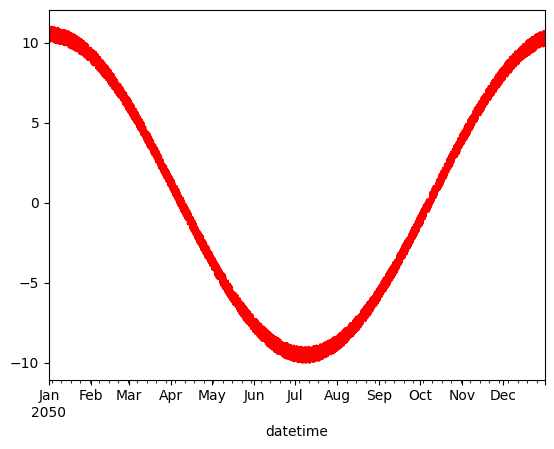

In [30]:
path = 'C:/Users/anaju/OneDrive/Documentos/GitHub/Controle_AnaPietroski'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


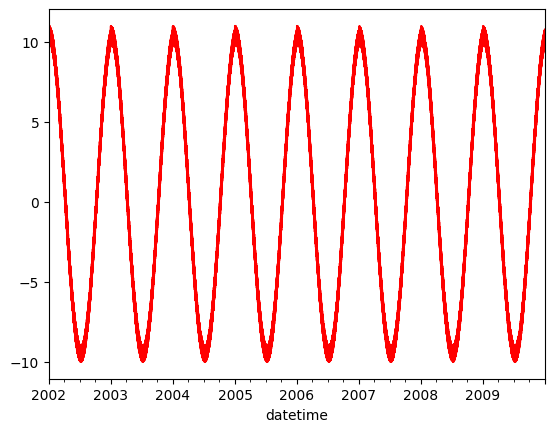

In [31]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [33]:
df


,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.944628,1.000000,10.944628
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.857839,1.000000,10.857837
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.382848,0.999999,10.382839
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.174190,0.999998,10.174168
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.073585,0.999996,10.073546
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.243969,0.979401,10.037976
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.801195,0.979541,10.596603
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.151694,0.979680,9.948496


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


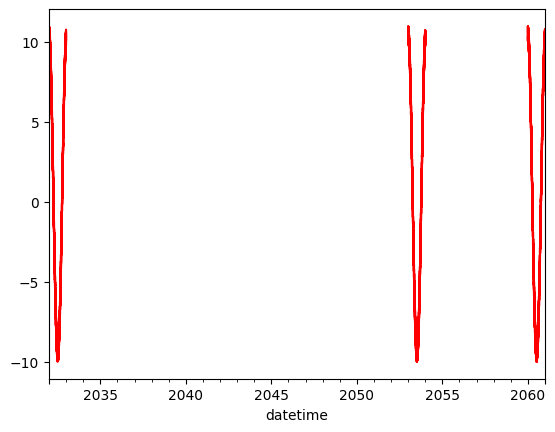

In [34]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [35]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['.git', '.gitignore', 'Atividade01_Etapa01.ipynb', 'Aula01.ipynb', 'inputs', 'noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv', 'README.md', 'scripts', 'venv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [36]:
allDataDf = pd.concat(allData)

In [37]:
allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.250519,1.000000,10.250519
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.161397,1.000000,10.161394
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.112525,0.999999,10.112516
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.125211,0.999998,10.125189
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.584330,0.999996,10.584292
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.776400,0.982630,10.602700
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.634801,0.982759,10.462387
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.163587,0.982887,9.992455
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.941504,0.983014,10.771649


In [ ]:
plt.plot(allDataDf['datetime'],allDataDf['timeSeries'])